In [22]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input, Lambda
from keras.layers import Input, Conv1D, Dense, Flatten, Activation, SpatialDropout1D, Dropout
from keras.layers import Conv2D, MaxPooling2D, Reshape
from keras import backend as K
from keras.losses import mse, binary_crossentropy
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import pandas as pd
from keras import regularizers, optimizers

from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler

In [2]:
df = pd.read_csv("datasets/creditcardfraud/creditcard.csv", sep=",", index_col=None)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,1.642058,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [4]:
anomalies = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

anomalies.shape, normal.shape


((492, 31), (284315, 31))

In [89]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    

data_set = pd.concat([normal[:10000], anomalies])

x_train, x_test = train_test_split(data_set, test_size = 0.4, random_state = 42)

x_train = x_train.sort_values(by=['Time'])
x_test = x_test.sort_values(by=['Time'])

y_train = x_train["Class"]
y_test = x_test["Class"]

x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)

x_train.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
34,-1.996036,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,-0.346153
140,-1.994751,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-1.270478,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,3.323411
204,-1.993740,-0.541889,0.907745,0.941842,0.993748,0.844724,0.360280,0.761737,-0.222477,0.179748,...,0.146140,-0.203112,-0.122944,-0.438462,-0.996350,0.093796,-0.216346,0.015375,-0.038491,-0.258995
322,-1.991613,-1.169087,1.096292,0.669688,1.052534,0.422465,0.703450,0.039273,0.672068,-0.457399,...,-0.115601,-0.010604,0.224395,0.001345,-0.807532,0.035781,-0.198104,0.091107,0.075884,-0.349271
398,-1.990518,1.268069,0.285832,-0.147276,1.047742,0.672115,0.656656,0.138315,-0.010785,0.158271,...,-0.051828,-0.177627,-0.189526,-0.251549,-1.266236,0.901899,-0.230845,0.048271,0.004764,-0.327082
437,-1.989950,-0.404142,0.502744,1.057148,0.741630,0.537624,-0.003377,0.458034,0.219621,0.171714,...,-0.232750,-0.001555,0.049340,-0.076364,-0.488021,-0.394884,-0.415454,0.182786,0.169169,-0.307411
475,-1.989171,-0.703183,1.210704,0.713731,1.146381,0.196790,0.468060,0.204977,0.627389,-0.296261,...,0.015529,-0.052939,0.044339,-0.184853,-0.776439,0.021548,-0.166427,0.297892,0.128381,-0.297296
476,-1.989171,-1.046362,0.720386,1.603413,0.608371,0.460941,-1.423406,0.266079,-0.141048,-0.516793,...,0.122035,-0.231027,-0.529575,-0.106293,0.704604,-0.349903,0.146041,0.289965,0.159572,-0.342555
594,-1.987191,-1.146103,1.350274,0.907209,-0.040682,-0.242920,-1.099859,0.579042,0.045619,0.460784,...,0.331216,-0.396947,-0.895759,0.099686,0.275643,-0.045217,0.095849,0.563119,0.307945,-0.281304
595,-1.987191,1.063317,-0.795951,1.268759,0.646970,-1.420886,0.438476,-1.104653,0.370817,-0.492432,...,-0.520121,-0.272119,-0.356986,0.093599,0.157001,0.082895,-0.399381,0.087402,0.039421,-0.097352


In [90]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(6295, 30)
y_train:(6295,)

x_test:(4197, 30)
y_test:(4197,)



In [115]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)
input_shape = (x_train.shape[1], 1)

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [116]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(6295, 30, 1)
y_train:(6295,)

x_test:(4197, 30, 1)
y_test:(4197,)

input_shape:(30, 1)



In [117]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [128]:
logfilename = "variationalTCNautoencoder"


original_dim  = x_train.shape[1]

print(original_dim)

input_shape = (original_dim, 1)
intermediate_dim = 15
batch_size = original_dim
latent_dim = 2
epochs = 60


# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')

reshape = Reshape((original_dim, 1))(inputs)

conv_1 = Conv1D(filters=original_dim, kernel_size=2, dilation_rate=1,
                padding='valid', strides=1,
                kernel_regularizer=regularizers.l2(0.01),
                activation='relu')(reshape)

drop_1 = SpatialDropout1D(0.05)(conv_1)

conv_2 = Conv1D(filters=15, kernel_size=2, dilation_rate=2,
                padding='valid',strides=1, kernel_regularizer=regularizers.l2(0.01),
                activation='relu')(drop_1)

drop_2 = SpatialDropout1D(0.05)(conv_2)

conv_3 = Conv1D(filters=10, kernel_size=2, dilation_rate=2,
                padding='valid',strides=1, kernel_regularizer=regularizers.l2(0.01),
                activation='relu')(drop_2)

drop_3 = SpatialDropout1D(0.05)(conv_3)

flat_1 = Flatten()(drop_3)

x = Dense(intermediate_dim, activation='relu')(flat_1)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# build decoder model
latent_inputs = Input(shape=(latent_dim, ), name='z_sampling')


x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)
outputs = Reshape((original_dim, 1))(outputs)
# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')


# VAE loss = mse_loss or xent_loss + kl_loss
reconstruction_loss = mse(inputs, outputs)

reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

30
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
encoder_input (InputLayer)       (None, 30, 1)         0                                            
____________________________________________________________________________________________________
reshape_42 (Reshape)             (None, 30, 1)         0           encoder_input[0][0]              
____________________________________________________________________________________________________
conv1d_188 (Conv1D)              (None, 29, 30)        90          reshape_42[0][0]                 
____________________________________________________________________________________________________
spatial_dropout1d_173 (SpatialDr (None, 29, 30)        0           conv1d_188[0][0]                 
________________________________________________________________________________________

In [129]:


vae.compile(optimizer='adam', 
                    loss='mean_squared_error',
                    metrics=['accuracy'])
vae.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 30, 1)             0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 5144      
_________________________________________________________________
decoder (Model)              (None, 30, 1)             525       
Total params: 5,669
Trainable params: 5,669
Non-trainable params: 0
_________________________________________________________________


In [130]:
history = vae.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    callbacks=[TensorBoard(log_dir='../logs/{0}'.format(logfilename))])

Train on 6295 samples, validate on 4197 samples
Epoch 1/60
6240/6295 [============================>.] - ETA: 0s - loss: 77.1913 - acc: 0.0000e+00

InvalidArgumentError: Incompatible shapes: [25,30] vs. [25]
	 [[Node: add_33 = Add[T=DT_FLOAT, _class=["loc:@training_11/Adam/gradients/add_33_grad/Reshape"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](mul_32, mul_33)]]
	 [[Node: metrics_15/acc/Mean_1/_643 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1997_metrics_15/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'add_33', defined at:
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-128-607014e62c91>", line 77, in <module>
    vae_loss = K.mean(reconstruction_loss + kl_loss)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tensorflow\python\ops\math_ops.py", line 850, in binary_op_wrapper
    return func(x, y, name=name)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 306, in add
    "Add", x=x, y=y, name=name)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [25,30] vs. [25]
	 [[Node: add_33 = Add[T=DT_FLOAT, _class=["loc:@training_11/Adam/gradients/add_33_grad/Reshape"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](mul_32, mul_33)]]
	 [[Node: metrics_15/acc/Mean_1/_643 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1997_metrics_15/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [32]:
y_test

72        0
110       0
182       0
215       0
276       0
316       0
541       1
756       0
804       0
863       0
878       0
930       0
941       0
949       0
1006      0
1095      0
1105      0
1106      0
1306      0
1381      0
1400      0
1408      0
1463      0
1473      0
1588      0
1638      0
1823      0
1834      0
2031      0
2048      0
         ..
282195    0
282320    0
282431    0
282482    0
282645    0
282653    0
282703    0
282792    0
282840    0
282846    0
282966    0
283020    0
283081    0
283157    0
283177    0
283191    0
283263    0
283313    0
283317    0
283396    0
283400    0
283442    0
283460    0
283621    0
283781    0
283887    0
283950    0
283953    0
284189    0
284637    0
Name: Class, Length: 4197, dtype: int64

In [67]:
predictions = vae.predict(x_test)

mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,4197.000000,4197.000000
mean,2.080206,0.047653
std,9.316369,0.213057
min,0.111669,0.000000
25%,0.384379,0.000000
50%,0.603816,0.000000
75%,0.950286,0.000000
max,148.735236,1.000000


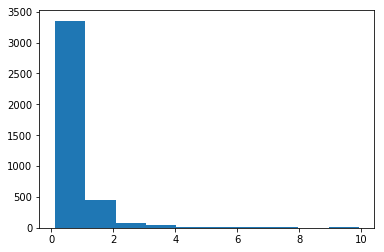

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [69]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

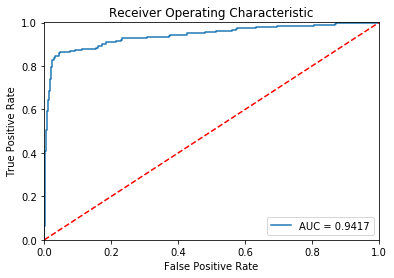

In [70]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [71]:
error_df.quantile(0.25)

reconstruction_error    0.384379
true_class              0.000000
Name: 0.25, dtype: float64

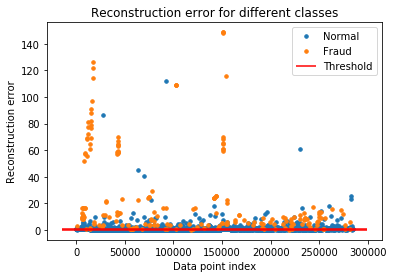

In [72]:
threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

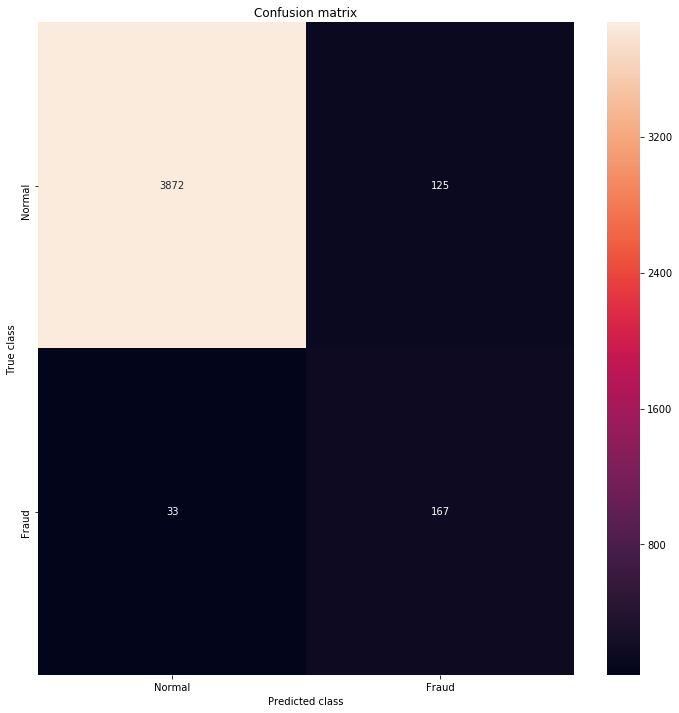

In [41]:
import seaborn as sns

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [55]:
anom_class = anomalies['Class']
anom = anomalies.drop('Class', axis=1)

anom.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-1.988034,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229
623,-1.986644,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758
4920,-1.902623,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031
6108,-1.849472,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342
6329,-1.838248,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231


In [59]:
anom = np.array(anom)

In [73]:

anom_predictions = vae.predict(anom)

anom_mse = np.mean(np.power(anom - anom_predictions, 2), axis=1)
anom_error_df = pd.DataFrame({'reconstruction_error': anom_mse,
                        'true_class': anom_class})

anom_error_df.describe()

,reconstruction_error,true_class
count,492.000000,492.0
mean,25.558837,1.0
std,36.054444,0.0
min,0.291191,1.0
25%,3.889768,1.0
50%,9.750224,1.0
75%,24.570386,1.0
max,268.036656,1.0


In [152]:
threshold.reconstruction_error

0.8488615962168935

In [150]:
print(np.array(anom_error_df.values[2][0]))

for f in range(0, len(anom_error_df)):
    print(np.array(anom_error_df.values[f][0]) > threshold)

3.4691920315681952
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
r

dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    False
true_class               True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    False
true_class               True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    False
true_class               True
dtype: bool
re

dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstr

dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    False
true_class               True
dtype: bool
reconstruction_error    False
true_class               True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reconstruction_error    True
true_class              True
dtype: bool
reco

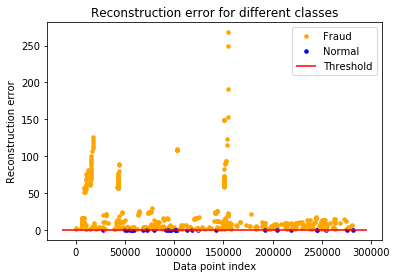

In [177]:
# threshold = threshold.reconstruction_error
groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()


for f in range(0, len(anom_error_df)):
    ax.plot(anom_error_df.index[f], anom_error_df.reconstruction_error.values[f], marker='o', ms=3.5, linestyle='',
           label="Fraud" if anom_error_df.reconstruction_error.values[f] > threshold else "Normal",
           color="orange" if anom_error_df.reconstruction_error.values[f] > threshold else "b")
    

    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)


plt.show();

In [178]:
counter = 0

for f in range(0, len(anom_error_df)):
    if anom_error_df.reconstruction_error.values[f] > threshold:
        counter = counter + 1
    
    
print("Accuracy: {}".format(counter / len(anom_error_df)))

Accuracy: 0.9410569105691057


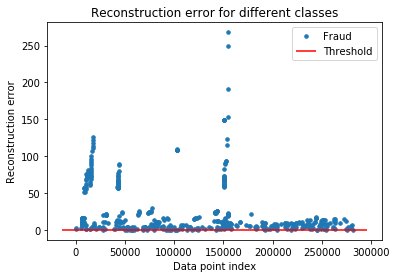

In [156]:

groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()



for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if ((group.reconstruction_error.values[name] > threshold)) else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
#### EVALUATION ON THE ENTIRE DF

In [184]:
points = np.array(df.drop('Class', axis=1))
truths = df['Class']

In [186]:
preds = vae.predict(points)

pred_mse = np.mean(np.power(points - preds, 2), axis=1)
pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': truths})

pred_error_df.describe()

,reconstruction_error,true_class
count,284807.000000,284807.000000
mean,1.026206,0.001727
std,5.229627,0.041527
min,0.107799,0.000000
25%,0.382638,0.000000
50%,0.597224,0.000000
75%,0.905637,0.000000
max,1806.988473,1.000000


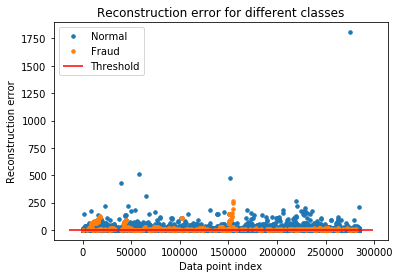

In [221]:
threshold = 1.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
groups = pred_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

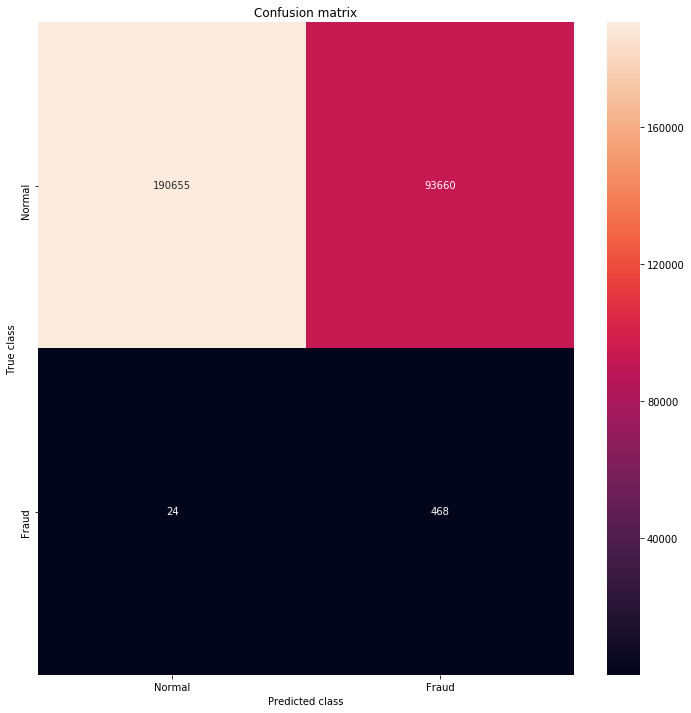

In [222]:
import seaborn as sns

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [223]:
counter = []

for f in range(0, len(pred_error_df)):
    if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [224]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, truths)
print("AUC: {:.2%}".format (auc))

AUC: 50.24%
